In [298]:
#analyze athlete data to understand trends in participation, characteristics of athletes, and their distribution across different countries and years.

import pandas as pd
import numpy as np


In [265]:
!pip install pandas numpy


Defaulting to user installation because normal site-packages is not writeable


In [299]:
data = pd.read_csv('Olympic_Athlete_Bio.csv')

In [300]:
df = data.copy()

In [301]:
df.head(7)

,athlete_id,name,sex,born,height,weight,country,country_noc,description,special_notes
0,65649,Ivanka Bonova,Female,4 April 1949,166.0,55,Bulgaria,BUL,Personal Best: 400 – 53.54 (1980).,NaN
1,112510,Nataliya Uryadova,Female,15 March 1977,184.0,70,Russian Federation,RUS,NaN,Listed in Olympians Who Won a Medal at the Eur...
2,114973,Essa Ismail Rashed,Male,14 December 1986,165.0,55,Qatar,QAT,Personal Best: 10000 – 27:20.97 (2006).,Listed in Olympians Who Won a Medal at the Asi...
3,30359,Péter Boros,Male,12 January 1908,NaN,NaN,Hungary,HUN,"Between 1927 and 1938, Péter Boros competed as...",NaN
4,50557,Rudolf Piowatý,Male,28 April 1900,NaN,NaN,Czechoslovakia,TCH,Rudolf Piowaty joined the Czechoslovak militar...,NaN
5,146111,Svetlana Kholomina,Female,9 November 1997,NaN,NaN,ROC,ROC,NaN,NaN
6,133041,Vincent Riendeau,Male,13 December 1996,178.0,68,Canada,CAN,NaN,Listed in Olympians Who Won a Medal at the Sum...


In [302]:
df.columns

Index(['athlete_id', 'name', 'sex', 'born', 'height', 'weight', 'country',
       'country_noc', 'description', 'special_notes'],
      dtype='object')

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155861 entries, 0 to 155860
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   athlete_id     155861 non-null  int64  
 1   name           155861 non-null  object 
 2   sex            155861 non-null  object 
 3   born           151808 non-null  object 
 4   height         105112 non-null  float64
 5   weight         105112 non-null  object 
 6   country        155861 non-null  object 
 7   country_noc    155861 non-null  object 
 8   description    54863 non-null   object 
 9   special_notes  60637 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 11.9+ MB


In [304]:
df.describe()

,athlete_id,height
count,1.558610e+05,105112.000000
mean,1.571606e+05,176.327194
std,3.274205e+05,10.355980
min,1.000000e+00,127.000000
25%,3.927100e+04,170.000000
50%,7.852900e+04,176.000000
75%,1.189230e+05,183.000000
max,2.200000e+07,226.000000


In [305]:
df.isna().sum()

athlete_id            0
name                  0
sex                   0
born               4053
height            50749
weight            50749
country               0
country_noc           0
description      100998
special_notes     95224
dtype: int64

In [306]:
df['born']

0              4 April 1949
1             15 March 1977
2          14 December 1986
3           12 January 1908
4             28 April 1900
                ...        
155856       8 January 1946
155857           2 May 1938
155858    19 September 1885
155859      13 January 1954
155860         22 June 1969
Name: born, Length: 155861, dtype: object

In [307]:
df.isna().sum()

athlete_id            0
name                  0
sex                   0
born               4053
height            50749
weight            50749
country               0
country_noc           0
description      100998
special_notes     95224
dtype: int64

In [308]:
df['born'] = pd.to_datetime(df['born'], format='%d %B %Y', errors='coerce')

# Format 'born' as 'DD-MM-YYYY'
df['born'] = df['born'].dt.strftime('%d-%m-%Y')


In [309]:
# pd.to_datetime(df['born'],format='%d-%B-%Y', errors='coerce')

In [310]:
df['born']

0         04-04-1949
1         15-03-1977
2         14-12-1986
3         12-01-1908
4         28-04-1900
             ...    
155856    08-01-1946
155857    02-05-1938
155858    19-09-1885
155859    13-01-1954
155860    22-06-1969
Name: born, Length: 155861, dtype: object

In [311]:
df['born']= df['born'].fillna(method ='ffill')
df['born']=df['born'].fillna(method = 'bfill')

/tmp/ipykernel_3792/2757513785.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['born']= df['born'].fillna(method ='ffill')
/tmp/ipykernel_3792/2757513785.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['born']=df['born'].fillna(method = 'bfill')


In [312]:
df['born'] = pd.to_datetime(df['born'], format='%d-%m-%Y', errors='coerce')

In [313]:
df['born']

0        1949-04-04
1        1977-03-15
2        1986-12-14
3        1908-01-12
4        1900-04-28
            ...    
155856   1946-01-08
155857   1938-05-02
155858   1885-09-19
155859   1954-01-13
155860   1969-06-22
Name: born, Length: 155861, dtype: datetime64[ns]

In [314]:
df['born'].isna().sum()

np.int64(0)

In [315]:
df['born_period'] = df['born'].dt.to_period('M')
df['born_period'] 

0         1949-04
1         1977-03
2         1986-12
3         1908-01
4         1900-04
           ...   
155856    1946-01
155857    1938-05
155858    1885-09
155859    1954-01
155860    1969-06
Name: born_period, Length: 155861, dtype: period[M]

In [316]:
df['year'] = df['born'].dt.year
df['year']

0         1949
1         1977
2         1986
3         1908
4         1900
          ... 
155856    1946
155857    1938
155858    1885
155859    1954
155860    1969
Name: year, Length: 155861, dtype: int32

In [317]:
year_grpby = df.groupby(['year','sex']).size().reset_index(name='count')
year_grpby.columns = ['year','sex','participation']
year_grpby

,year,sex,participation
0,1828,Male,1
1,1830,Male,1
2,1831,Male,3
3,1833,Male,2
4,1836,Male,2
...,...,...,...
333,2006,Male,2
334,2007,Female,3
335,2008,Female,3
336,2009,Female,1


In [318]:
import matplotlib.pyplot as plt
import seaborn as sns

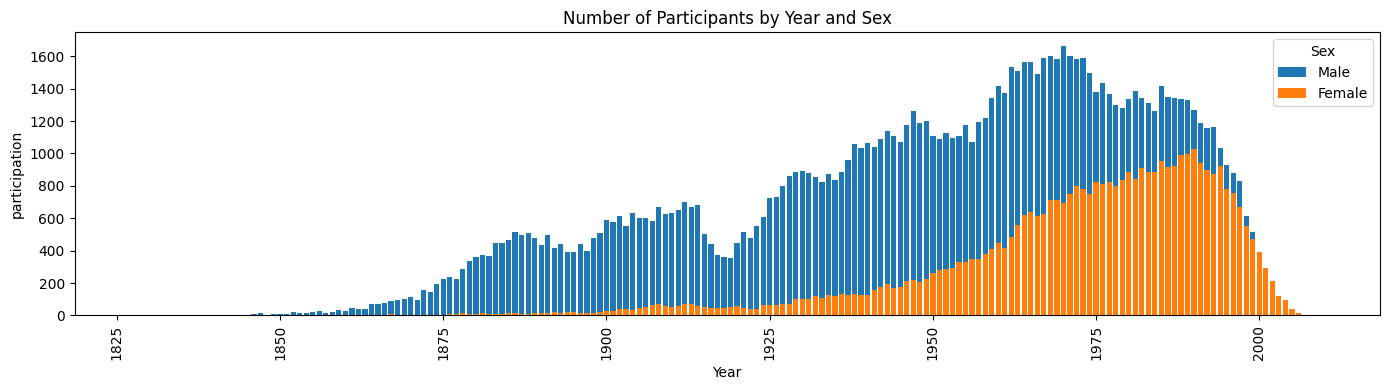

In [322]:
plt.figure(figsize =(14,4))
# Plot data
for sex in year_grpby['sex'].unique():
    subset = year_grpby[year_grpby['sex'] == sex]
    plt.bar(subset['year'], subset['participation'], label=sex)
# Add labels and title
plt.xlabel('Year')
plt.ylabel('participation')
plt.title('Number of Participants by Year and Sex')
plt.legend(title='Sex')

# Show the plot
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

year    1828  1830  1831  1833  1836  1837  1838  1839  1840  1841  ...  \
sex                                                                 ...   
Female   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   1.0   NaN  ...   
Male     1.0   1.0   3.0   2.0   2.0   1.0   3.0   1.0   2.0   3.0  ...   

year     2000   2001   2002   2003  2004  2005  2006  2007  2008  2009  
sex                                                                     
Female  393.0  290.0  211.0  123.0  96.0  41.0  15.0   3.0   3.0   1.0  
Male    383.0  233.0  124.0   68.0  31.0  11.0   2.0   NaN   NaN   1.0  

[2 rows x 178 columns]


ValueError: Unknown format code 'd' for object of type 'float'

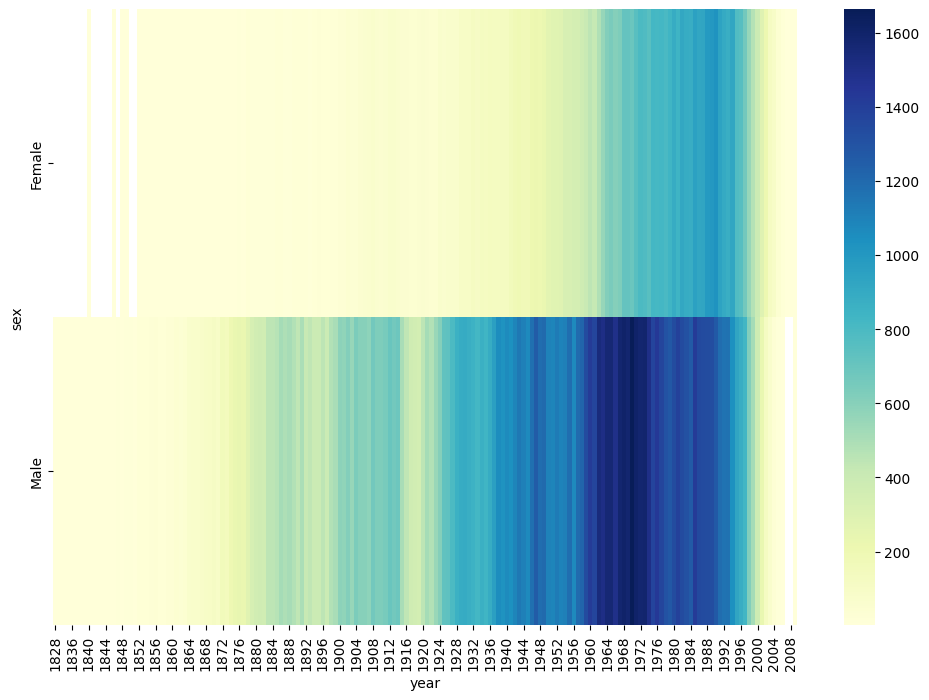

In [323]:
pivot_table = year_grpby.pivot(index='sex', columns='year', values='participation')
print(pivot_table)
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel('Year')
plt.ylabel('Sex')
plt.title('Heatmap of Participants by Year and Sex')
plt.show()

In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155861 entries, 0 to 155860
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   athlete_id     155861 non-null  int64         
 1   name           155861 non-null  object        
 2   sex            155861 non-null  object        
 3   born           155861 non-null  datetime64[ns]
 4   height         105112 non-null  float64       
 5   weight         105112 non-null  object        
 6   country        155861 non-null  object        
 7   country_noc    155861 non-null  object        
 8   description    54863 non-null   object        
 9   special_notes  60637 non-null   object        
 10  born_period    155861 non-null  period[M]     
 11  year           155861 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(7), period[M](1)
memory usage: 13.7+ MB


In [325]:
df.head(3)

,athlete_id,name,sex,born,height,weight,country,country_noc,description,special_notes,born_period,year
0,65649,Ivanka Bonova,Female,1949-04-04,166.0,55,Bulgaria,BUL,Personal Best: 400 – 53.54 (1980).,NaN,1949-04,1949
1,112510,Nataliya Uryadova,Female,1977-03-15,184.0,70,Russian Federation,RUS,NaN,Listed in Olympians Who Won a Medal at the Eur...,1977-03,1977
2,114973,Essa Ismail Rashed,Male,1986-12-14,165.0,55,Qatar,QAT,Personal Best: 10000 – 27:20.97 (2006).,Listed in Olympians Who Won a Medal at the Asi...,1986-12,1986


In [326]:
# outliers remove by IQR (Inter quartile range)

# q1 =np.percentile(df,25)
# q2= np.percentile(df,75)
# iqr = q3 -q1
# lower_bound = q1 -1.5* iqr
# upper_bound = q3 +1.5*iqr

q1=df['height'].quantile(0.25)
q3=df['height'].quantile(0.75)
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr
lower,upper

(np.float64(150.5), np.float64(202.5))

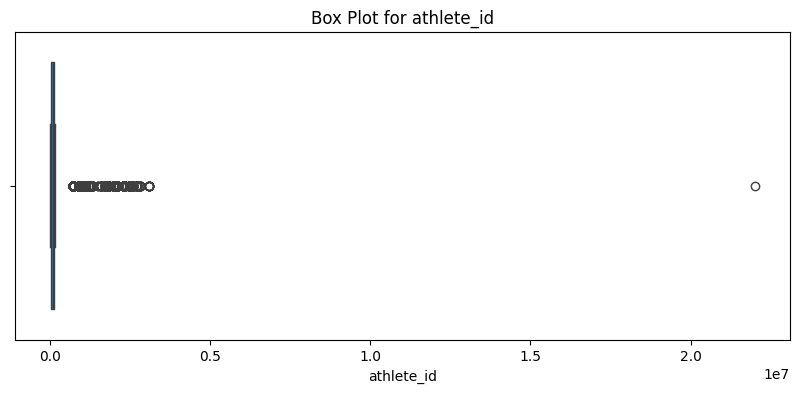

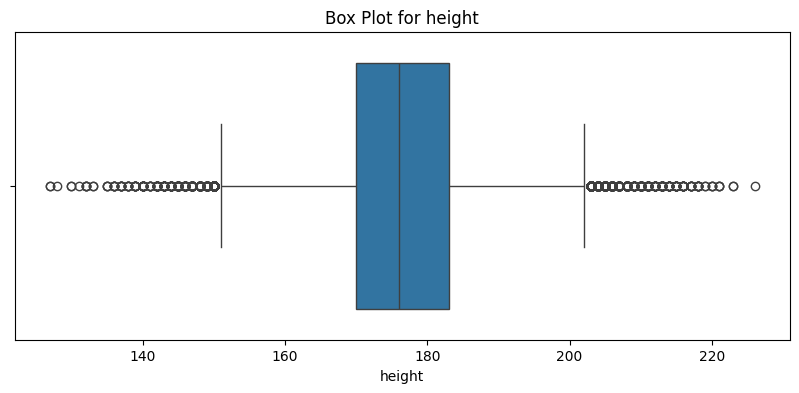

In [327]:
# outliers check
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(10, 4))
        sns.boxplot(x=df[column])
        plt.title(f'Box Plot for {column}')
        plt.show()

In [328]:
# out=data[(data['amt']>lower) & (data['amt']<upper)]
# outlier=data[(data['amt']<lower)| (data['amt']>upper)]
out=df[(df['height'] > lower) & (df['height'] < upper)]
out

,athlete_id,name,sex,born,height,weight,country,country_noc,description,special_notes,born_period,year
0,65649,Ivanka Bonova,Female,1949-04-04,166.0,55,Bulgaria,BUL,Personal Best: 400 – 53.54 (1980).,NaN,1949-04,1949
1,112510,Nataliya Uryadova,Female,1977-03-15,184.0,70,Russian Federation,RUS,NaN,Listed in Olympians Who Won a Medal at the Eur...,1977-03,1977
2,114973,Essa Ismail Rashed,Male,1986-12-14,165.0,55,Qatar,QAT,Personal Best: 10000 – 27:20.97 (2006).,Listed in Olympians Who Won a Medal at the Asi...,1986-12,1986
6,133041,Vincent Riendeau,Male,1996-12-13,178.0,68,Canada,CAN,NaN,Listed in Olympians Who Won a Medal at the Sum...,1996-12,1996
7,110425,Tanja Morel,Female,1975-10-04,164.0,58,Switzerland,SUI,NaN,Listed in Olympians Who Won a Medal at the Eur...,1975-10,1975
...,...,...,...,...,...,...,...,...,...,...,...,...
155854,26283,Muhaisin Al-Jamaan,Male,1966-04-06,175.0,62,Kingdom of Saudi Arabia,KSA,NaN,Listed in Olympians Who Won a Medal at the Asi...,1966-04,1966
155856,23748,Todd Makler,Male,1946-01-08,183.0,75,United States,USA,"Todd Makler grew up in suburban Philadelphia, ...","Brother of Brooke Makler Son of Paul Makler, Sr.",1946-01,1946
155857,58581,Géza Hollósi,Male,1938-05-02,175.0,79,Hungary,HUN,Géza Hollósi had the following finishes at maj...,NaN,1938-05,1938
155859,69900,Alexander Thieme,Male,1954-01-13,187.0,84,East Germany,GDR,East German Sprinter Alexander Thieme reached ...,Listed in Olympians Who Won a Medal at the Eur...,1954-01,1954


In [329]:
## now at this point cleaned data in out dataframe --> out

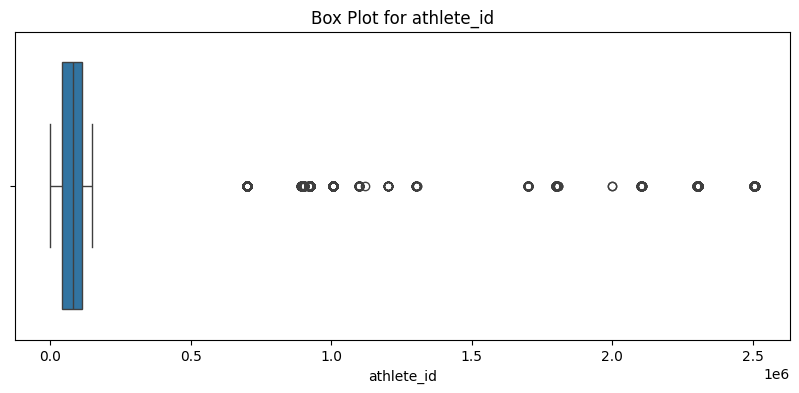

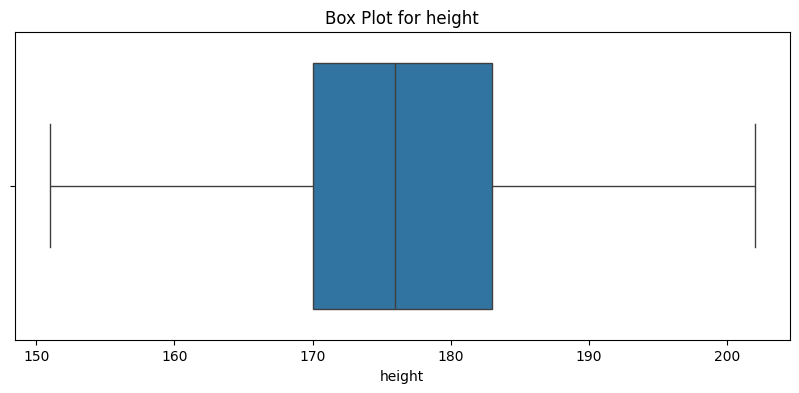

In [295]:
for column in out.columns:
    if df[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(10, 4))
        sns.boxplot(x=out[column])
        plt.title(f'Box Plot for {column}')
        plt.show()

In [331]:
out.columns

Index(['athlete_id', 'name', 'sex', 'born', 'height', 'weight', 'country',
       'country_noc', 'description', 'special_notes', 'born_period', 'year'],
      dtype='object')

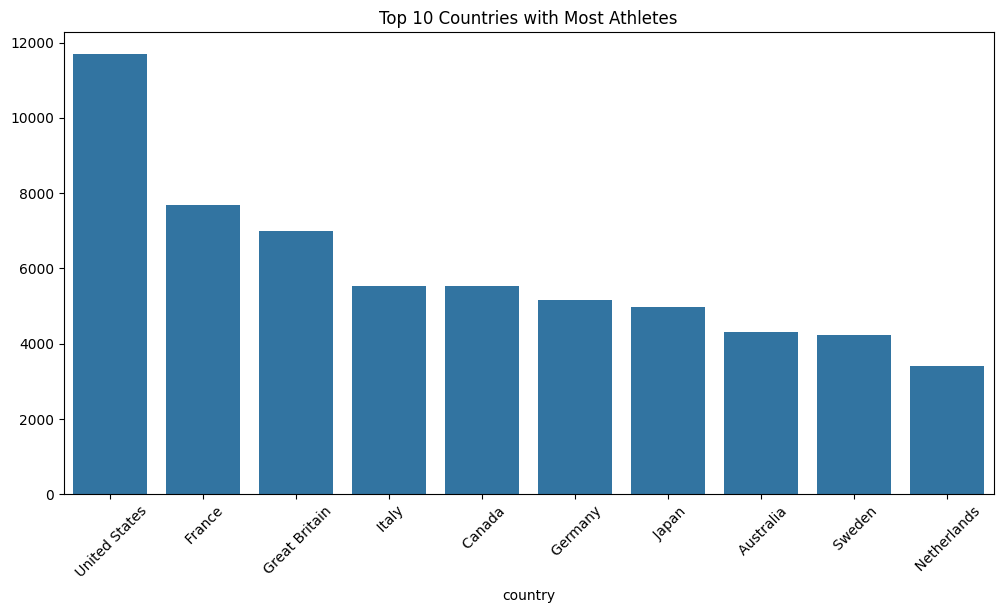

In [333]:
# Country Analysis
plt.figure(figsize=(12, 6))
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 10 Countries with Most Athletes')
plt.xticks(rotation=45)
plt.show()


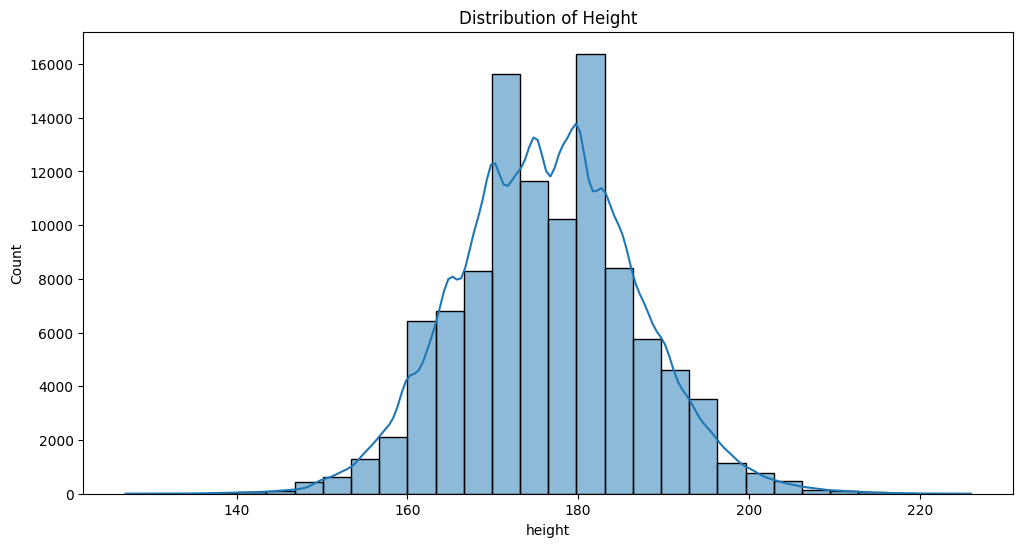

In [336]:

# Height and Weight Analysis
plt.figure(figsize=(12, 6))
sns.histplot(df['height'], kde=True, bins=30)
plt.title('Distribution of Height')
plt.show()